In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing TrainData File

In [2]:
train_data = pd.read_csv('Airplane_Accident_train.csv', index_col = 'Accident_ID')

### Concerting string outputs into numbers

In [3]:
dic = {'Highly_Fatal_And_Damaging':1, 'Minor_Damage_And_Injuries':2, 'Significant_Damage_And_Fatalities':3, 'Significant_Damage_And_Serious_Injuries':4}
train_data['Severity'] = train_data['Severity'].map(dic)

In [4]:
train_data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,2,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,2,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,4,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [5]:
train_data.dtypes

Severity                     int64
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
dtype: object

In [6]:
train_data.describe()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2.410400,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635
std,1.182249,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316
25%,1.000000,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063
50%,2.000000,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467
75%,4.000000,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059
max,4.000000,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378


In [7]:
train_data.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
dtype: int64

In [8]:
print(train_data.groupby('Severity').Severity.count())

Severity
1    3049
2    2527
3    1695
4    2729
Name: Severity, dtype: int64


In [9]:
pred1 = train_data[train_data['Severity']==1]
pred2 = train_data[train_data['Severity']==2]
pred3 = train_data[train_data['Severity']==3]
pred4 = train_data[train_data['Severity']==4]

### Features hava been selected on the basic of their feature importance score of Gradient Boosting Classifier

In [10]:
X = train_data.drop(['Severity', 'Violations', 'Total_Safety_Complaints', 'Cabin_Temperature', 'Max_Elevation', 'Adverse_Weather_Metric', 'Turbulence_In_gforces', 'Accident_Type_Code'], axis = 1)
y = train_data['Severity']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
X_train.head()

,Safety_Score,Days_Since_Inspection,Control_Metric
Accident_ID,,,
5845,52.648402,6,80.036463
11408,25.844749,14,66.909754
11548,33.698630,15,48.587056
9362,29.726027,13,87.556974
8091,37.534247,10,59.298086


In [13]:
y_train.head()

Accident_ID
5845     1
11408    1
11548    2
9362     1
8091     1
Name: Severity, dtype: int64

In [14]:
X.shape

(10000, 3)

In [15]:
print(len(X.columns))

3


### Plots representing each classes

<IPython.core.display.Javascript object>


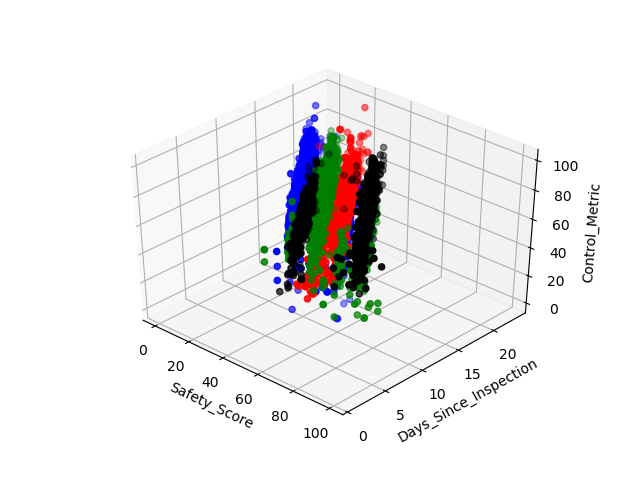

Text(0.5, 0, 'Control_Metric')

In [16]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 =[pred1['Safety_Score']]
y1 =[pred1['Days_Since_Inspection']]
z1 =[pred1['Control_Metric']]

x2 =[pred2['Safety_Score']]
y2 =[pred2['Days_Since_Inspection']]
z2 =[pred2['Control_Metric']]

x3 =[pred3['Safety_Score']]
y3 =[pred3['Days_Since_Inspection']]
z3 =[pred3['Control_Metric']]

x4 =[pred4['Safety_Score']]
y4 =[pred4['Days_Since_Inspection']]
z4 =[pred4['Control_Metric']]


ax.scatter(x1, y1, z1, c='b')
ax.scatter(x2, y2, z2, c='r')
ax.scatter(x3, y3, z3, c='black')
ax.scatter(x4, y4, z4, c='g')

ax.set_xlabel('Safety_Score')
ax.set_ylabel('Days_Since_Inspection')
ax.set_zlabel('Control_Metric')


## Classifiers
* Random Forest Classifier
* Gradient Boosting Classifier
* Logistic Regression
* SVM
* Neural Networks

### Gradient Boosting Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
model2=GradientBoostingClassifier(n_estimators=2000, max_depth=4, learning_rate=0.1)
model2.fit(X_train, y_train)

y_pred_train2 = model2.predict(X_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import f1_score
print(f1_score(y_train, y_pred_train2, average='weighted'))
print(f1_score(y_test, y_pred2, average='weighted'))

0.9997333409569142
0.9719970390477816


### Checking Feature Importance

In [18]:
fea_imp = pd.Series(model2.feature_importances_,X_train.columns)
fea_imp

Safety_Score             0.528734
Days_Since_Inspection    0.244990
Control_Metric           0.226276
dtype: float64

In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred_train2))

[[2293    0    0    2]
 [   0 1900    0    0]
 [   0    0 1278    0]
 [   0    0    0 2027]]


In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred2))

[[730   6   7  11]
 [  5 613   2   7]
 [  6   1 407   3]
 [ 10   8   4 680]]


## Final Training on full Data Set

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
final_model=GradientBoostingClassifier(n_estimators=2000, max_depth=4, learning_rate=0.1)
final_model.fit(X, y)

y_pred_train_final = final_model.predict(X)
from sklearn.metrics import f1_score
print(f1_score(y, y_pred_train_final, average='weighted'))

0.9996999901426495


In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred_train_final))

[[3047    0    1    1]
 [   0 2527    0    0]
 [   0    0 1695    0]
 [   1    0    0 2728]]


## Importing Test Data and Final Prediction

In [23]:
test_data = pd.read_csv('Airplane_Accident_test.csv', index_col ='Accident_ID')

In [24]:
test_data.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
1,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692
10,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777
14,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316
17,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990
21,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696


In [25]:
test_data = test_data.drop(['Violations', 'Total_Safety_Complaints', 'Cabin_Temperature', 'Max_Elevation','Adverse_Weather_Metric', 'Turbulence_In_gforces', 'Accident_Type_Code'], axis = 1)

In [26]:
print(test_data.shape)

(2500, 3)


In [27]:
y_pred_final = final_model.predict(test_data)
y_pred_final

array([1, 3, 4, ..., 4, 4, 1], dtype=int64)

In [28]:
result = pd.DataFrame(data =y_pred_final, index = test_data.index, columns=['Severity'])

In [29]:
result.head()

,Severity
Accident_ID,
1,1
10,3
14,4
17,2
21,3


### Converting Final Predictions into strings 

In [30]:
rdic = {1:'Highly_Fatal_And_Damaging', 2:'Minor_Damage_And_Injuries', 3:'Significant_Damage_And_Fatalities', 4:'Significant_Damage_And_Serious_Injuries'}
result['Severity'] = result['Severity'].map(rdic)

In [31]:
result.head()

,Severity
Accident_ID,
1,Highly_Fatal_And_Damaging
10,Significant_Damage_And_Fatalities
14,Significant_Damage_And_Serious_Injuries
17,Minor_Damage_And_Injuries
21,Significant_Damage_And_Fatalities


In [32]:
result.to_csv('predictions.csv')

# Plots and Correlations related to Train Data

In [33]:
X.corr()

,Safety_Score,Days_Since_Inspection,Control_Metric
Safety_Score,1.000000,-0.685386,0.000564
Days_Since_Inspection,-0.685386,1.000000,-0.011963
Control_Metric,0.000564,-0.011963,1.000000


In [34]:
list(X.columns)

['Safety_Score', 'Days_Since_Inspection', 'Control_Metric']

<IPython.core.display.Javascript object>


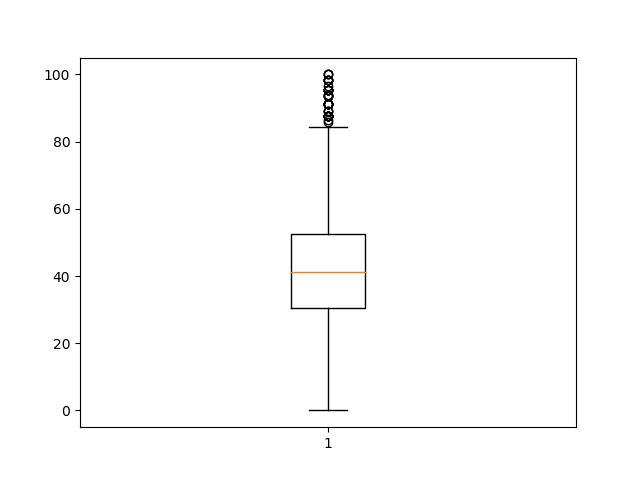

{'whiskers': [<matplotlib.lines.Line2D at 0x2034a8168d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2034a816f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x2034a816470>],
 'medians': [<matplotlib.lines.Line2D at 0x2034a8235f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2034a823940>],
 'means': []}

In [35]:
plt.figure()
plt.boxplot(train_data['Safety_Score'])

<IPython.core.display.Javascript object>


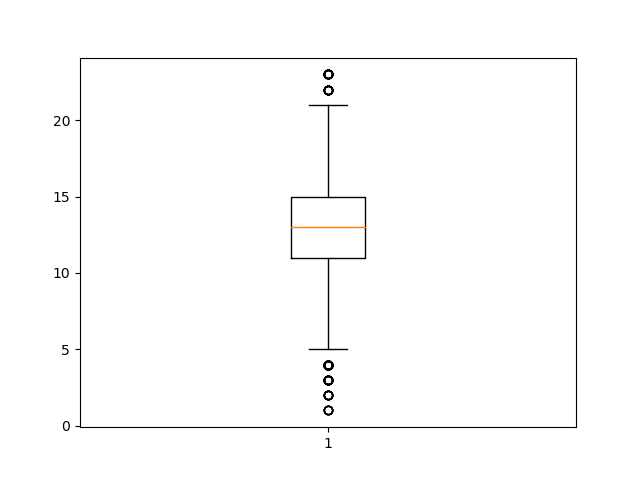

{'whiskers': [<matplotlib.lines.Line2D at 0x2034a8589e8>,
 'caps': [<matplotlib.lines.Line2D at 0x2034a858dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2034a8585c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2034a863710>],
 'fliers': [<matplotlib.lines.Line2D at 0x2034a863a58>],
 'means': []}

In [36]:
plt.figure()
plt.boxplot(train_data['Days_Since_Inspection'])

<IPython.core.display.Javascript object>


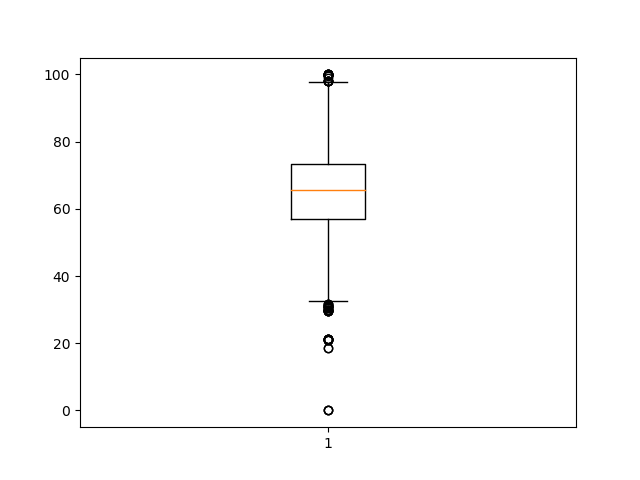

{'whiskers': [<matplotlib.lines.Line2D at 0x2034a894f60>,
 'caps': [<matplotlib.lines.Line2D at 0x2034a89e5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2034a894b38>],
 'medians': [<matplotlib.lines.Line2D at 0x2034a89ec88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2034a89efd0>],
 'means': []}

In [37]:
plt.figure()
plt.boxplot(train_data['Control_Metric'])